In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Products.xlsx")

In [3]:
df = df.set_index('Cust_ID')

In [4]:
df.columns = df.columns.str.replace("&", "_")

In [5]:
df.describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
count,4000.000000,4000.000000,4000,4000.000000,4000.000000,4000.000000
mean,32.020250,55.844750,2024-01-30 18:50:02.399999744,176.085000,33.602750,5.329500
min,0.000000,9.000000,2023-10-15 00:00:00,0.000000,28.000000,2.000000
25%,25.000000,38.000000,2024-01-20 00:00:00,121.000000,32.000000,4.000000
50%,31.000000,47.000000,2024-02-01 00:00:00,180.000000,33.000000,5.000000
75%,40.000000,66.000000,2024-02-13 00:00:00,230.000000,35.000000,6.000000
max,123.000000,464.000000,2024-02-29 00:00:00,1203.000000,42.000000,20.000000
std,14.469284,33.119109,NaN,69.964738,1.711483,1.515257


In [8]:
df.corr()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
Fitness_Gym,1.000000,0.011354,-0.152349,0.094951,-0.334984,0.031004
Hiking_Running,0.011354,1.000000,0.211452,0.386933,0.063670,0.359795
Last_Purchase,-0.152349,0.211452,1.000000,-0.008527,0.159496,0.201099
TeamGames,0.094951,0.386933,-0.008527,1.000000,0.023696,0.250361
OutdoorActivities,-0.334984,0.063670,0.159496,0.023696,1.000000,0.179792
TotalProducts,0.031004,0.359795,0.201099,0.250361,0.179792,1.000000


In [10]:
# Hiking&Running e TeamGames com high kurtosis, terão provavelmente outliers

df[["Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts"]].kurt()

Fitness_Gym           1.464810
Hiking_Running       37.839539
TeamGames            10.605494
OutdoorActivities     0.399144
TotalProducts         9.247286
dtype: float64

<Axes: xlabel='Hiking_Running'>

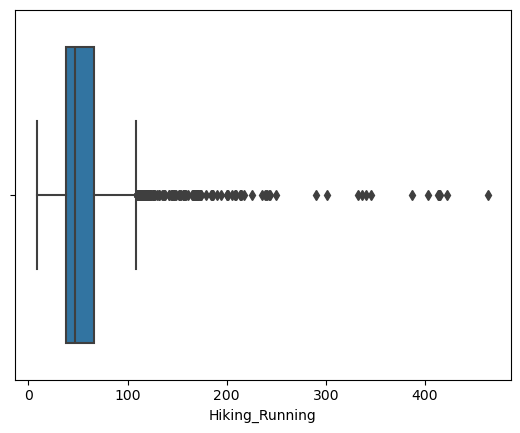

In [11]:
sns.boxplot(df, x='Hiking_Running')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hiking_Running', ylabel='Count'>

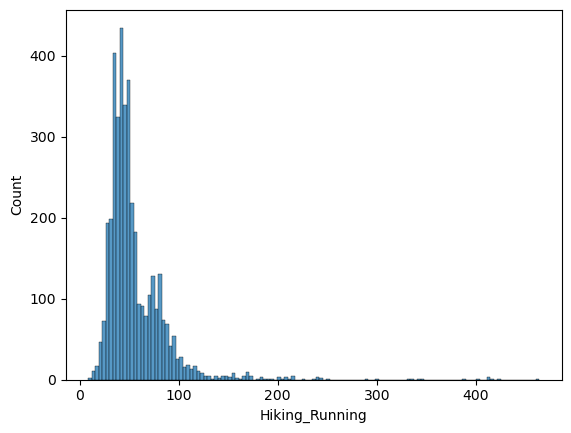

In [12]:
sns.histplot(df, x='Hiking_Running')

<Axes: xlabel='TeamGames'>

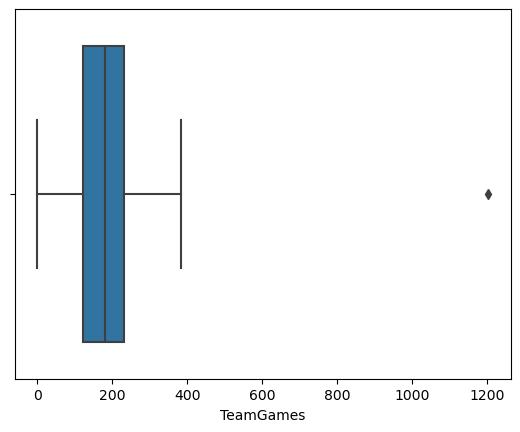

In [13]:
# Um outlier em grande escala, provavelmente pode se cortar

sns.boxplot(df, x='TeamGames')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TeamGames', ylabel='Count'>

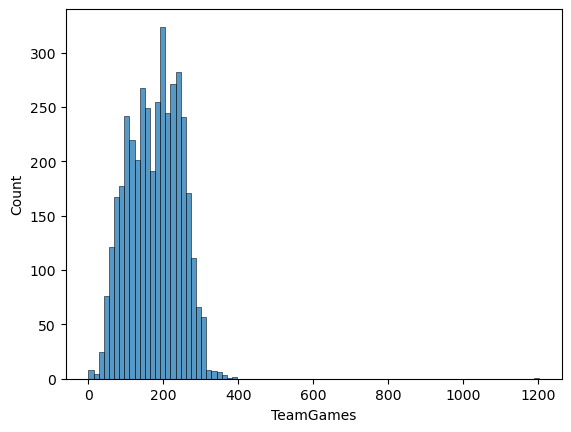

In [14]:
sns.histplot(df, x='TeamGames')

In [15]:
df_sqrt = df[["Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts"]]
df_sqrt["TotalProducts_sqrt"] = np.sqrt(df_sqrt["TotalProducts"])
df_sqrt["Hiking_Running_sqrt"] = np.sqrt(df_sqrt["Hiking_Running"])
df_sqrt["TeamGames_sqrt"] = np.sqrt(df_sqrt["TeamGames"])
df_sqrt["OutdoorActivities_sqrt"] = np.sqrt(df_sqrt["OutdoorActivities"])
df_sqrt["TotalProducts_sqrt"] = np.sqrt(df_sqrt["TotalProducts"])


In [65]:
df_sqrt.kurt()

TotalProducts_sqrt        2.769696
Hiking_Running_sqrt       9.745770
TeamGames_sqrt            0.700404
OutdoorActivities_sqrt    0.267362
dtype: float64

In [21]:
df_sqrt = df_sqrt.drop(columns=["Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts"])
df_sqrt

,TotalProducts_sqrt,Hiking_Running_sqrt,TeamGames_sqrt,OutdoorActivities_sqrt
Cust_ID,,,,
4,2.449490,8.717798,15.748016,6.082763
5,2.449490,8.660254,15.748016,6.082763
6,2.236068,8.306624,14.662878,5.830952
9,2.828427,8.426150,15.748016,5.916080
10,2.236068,9.848858,14.282857,5.830952
...,...,...,...,...
6489,2.000000,6.000000,7.280110,5.656854
6491,2.236068,5.656854,11.661904,5.830952
6492,2.236068,6.244998,9.643651,5.830952


c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TeamGames_sqrt', ylabel='Count'>

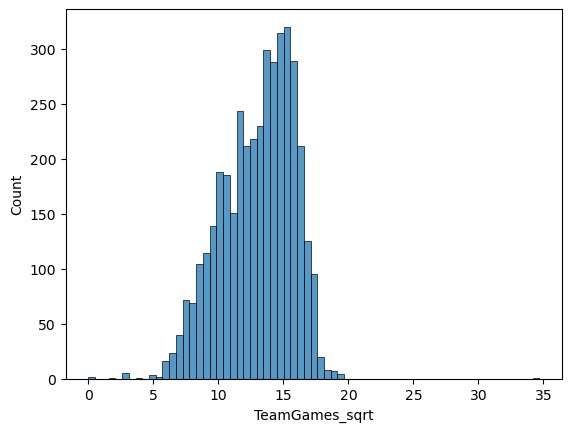

In [16]:
sns.histplot(df_sqrt, x='TeamGames_sqrt')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hiking_Running_sqrt', ylabel='Count'>

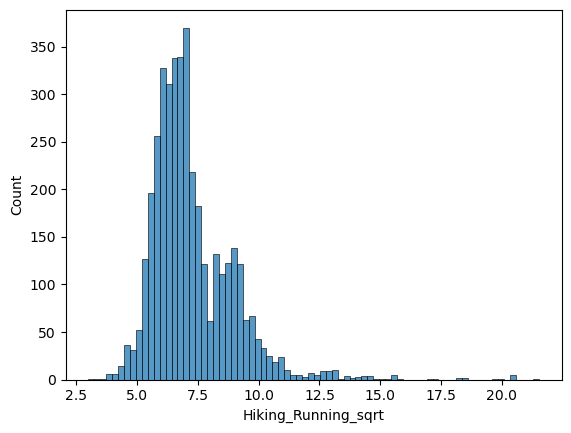

In [17]:
sns.histplot(df_sqrt, x='Hiking_Running_sqrt')

In [57]:
scaler = StandardScaler()

In [58]:
df_scaled = scaler.fit_transform(df_sqrt)

In [59]:
pca_model = PCA(n_components=2)
pc = pca_model.fit_transform(df_scaled)

In [60]:
df_f = pd.DataFrame(pc, index=df_sqrt.index)

In [61]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

In [62]:
clustered = km.fit_predict(df_f)

In [63]:
df_f["cluster"] = km.labels_

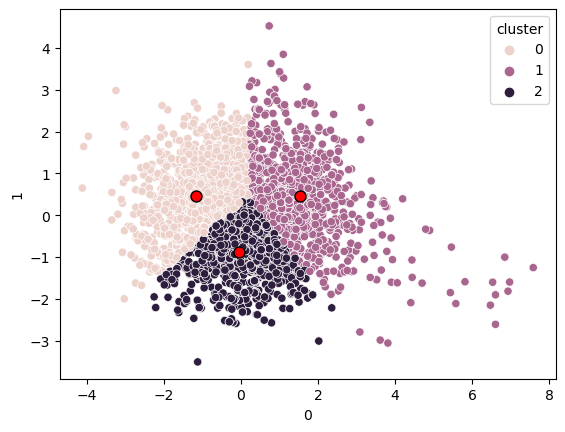

In [64]:
sns.scatterplot(df_f, x=df_f[0], y=df_f[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
km.cluster_centers_[:, 1],
s=250, marker='.',
c='red', edgecolor='black',
label='Centroids')